<h1>Prepare Data</h1>

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score

SECONDS_IN_YEAR = (dt.datetime(2021, 1, 1) - dt.datetime(2020, 1, 1)).total_seconds()

def get_population_density(location):
    if location == "Los Angeles;CA":
        return 1

def get_SINE(date):
    seconds = (date - dt.datetime(2020, 1, 1, 0)).total_seconds()
    return np.sin(2 * np.pi * seconds / SECONDS_IN_YEAR)

def get_COSINE(date):
    seconds = (date - dt.datetime(2020, 1, 1, 0)).total_seconds()
    return np.cos(2 * np.pi * seconds / SECONDS_IN_YEAR)

def get_hour_difference(start_datetime, end_datetime):
    return (end_datetime - start_datetime).total_seconds() / 3600

# Import file
import_file = "UberX_Los_Angeles_CA_V2.csv"
columns = ["Location", "Datetime", "NPEPH"]
df = pd.read_csv(import_file, names=columns)

# Change to numerical data
df["Location"] = df["Location"].map(get_population_density)
df["Datetime"] = pd.to_datetime(df["Datetime"], format="%Y-%m-%d", errors="coerce")
df["DayOfWeek"] = df["Datetime"].dt.dayofweek
df["Datetime"] = (df["Datetime"] - dt.datetime(2020, 1, 1)).dt.total_seconds()
df["Datetime_SINE"] = np.sin(2 * np.pi * df["Datetime"] / SECONDS_IN_YEAR)
df["Datetime_COSINE"] = np.cos(2 * np.pi * df["Datetime"] / SECONDS_IN_YEAR)
df = df[["Location", "Datetime_SINE", "Datetime_COSINE", "DayOfWeek", "NPEPH"]]

# Separate features and classes
feature_names = ["Location", "Datetime_SINE", "Datetime_COSINE", "DayOfWeek"]
all_features = df[feature_names].values
all_classes_NPEPH = df["NPEPH"].values

# Normalize data
scaler = preprocessing.StandardScaler()
all_features_scaled = scaler.fit_transform(all_features)

# Test inputs
location = get_population_density("Los Angeles;CA")
datetime = dt.datetime(2020, 10, 5, 0, 0)
datetime_SINE = get_SINE(datetime)
datetime_COSINE = get_COSINE(datetime)
dayOfWeek = datetime.weekday()

df.describe()

,Location,Datetime_SINE,Datetime_COSINE,DayOfWeek,NPEPH
count,234.0,234.000000,234.000000,234.000000,234.000000
mean,1.0,-0.320956,0.237196,3.081197,18.567222
std,0.0,0.651828,0.647653,1.988656,5.579310
min,1.0,-0.999963,-0.999411,0.000000,3.270000
25%,1.0,-0.890617,-0.368723,1.000000,14.840000
50%,1.0,-0.579421,0.416109,3.000000,18.185000
75%,1.0,0.158093,0.832042,5.000000,21.620000
max,1.0,0.973264,1.000000,6.000000,37.940000


<h1>Stats</h1>

In [3]:
NPEPH_mean = df["NPEPH"].mean()
print("NPEPH Mean:", NPEPH_mean)

NPEPH_std = df["NPEPH"].std()
print("NPEPH STD:", NPEPH_std)

NPEPH_variance = NPEPH_std * NPEPH_std
print("NPEPH Variance:", NPEPH_variance)

NPEPH Mean: 18.567222222222227
NPEPH STD: 5.579310375664892
NPEPH Variance: 31.128704268001915


<h1>Per One Hour</h1>

In [4]:
from scipy.stats import norm

base = norm(loc=NPEPH_mean, scale=NPEPH_std)
EV = base.expect(lambda x: abs(x - NPEPH_mean), lb=0, ub=NPEPH_mean)
print("Expected Value:", EV)

Expected Value: 2.217059955993303


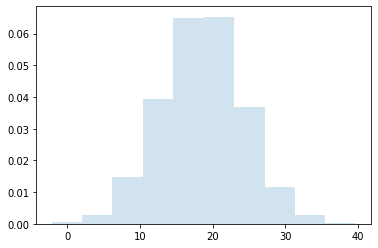

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, sharex=True)
ax.hist(base.rvs(10000), density=True, histtype='stepfilled', alpha=0.2)
plt.show()